In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
movie = pd.read_csv(r"C:\Users\sad57\Desktop\The journey\Data_Sets\EDA\movies.csv")
movie.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Overview on data

In [3]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
movie.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


# Check massing values

In [5]:
movie.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

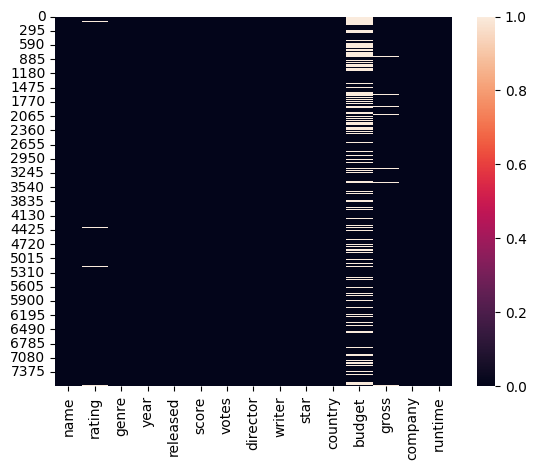

In [6]:
# Show missing by vis  
sns.heatmap(movie.isna())  
plt.show()

# Data Cleaning

In [7]:
# fix budget nan values and casting it to int 
movie['budget'] = movie['budget'].fillna(movie['budget'].mean()).astype(int)

In [8]:
# fix gross from nan Values: 
movie['gross'] = movie['gross'].fillna(movie['gross'].mean()).astype(int)

In [9]:
# fix rating column: 
movie['rating'] = movie['rating'].fillna('Not Rated')

In [10]:
movie['rating'].value_counts()

rating
R            3697
PG-13        2112
PG           1252
Not Rated     360
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: count, dtype: int64

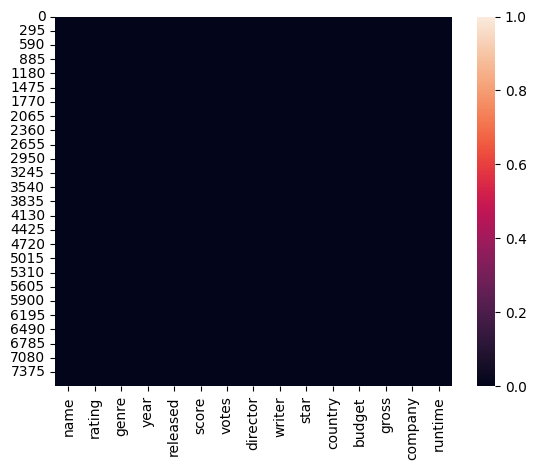

In [11]:
# now we hve clear data: 
sns.heatmap(movie.isna())
plt.show()

In [12]:
# We have two columns representing the released year 
movie = movie.drop('year', axis=1)

In [13]:
movie.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [14]:
movie['name'].drop_duplicates(inplace=True)

movie

# EDA

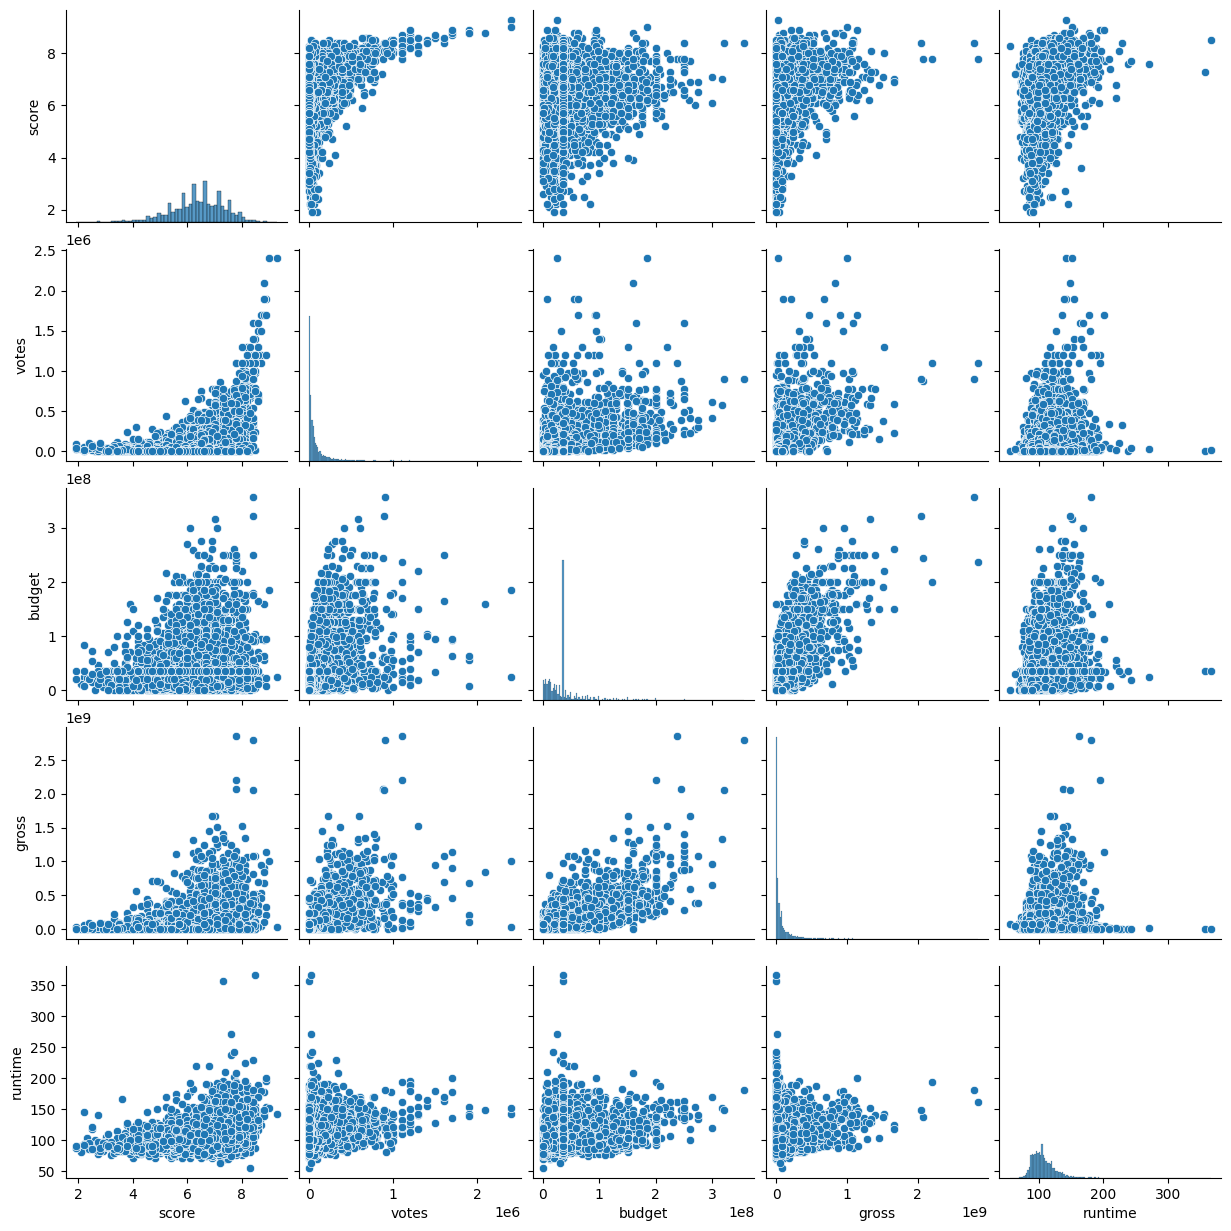

In [61]:
sns.pairplot(movie)

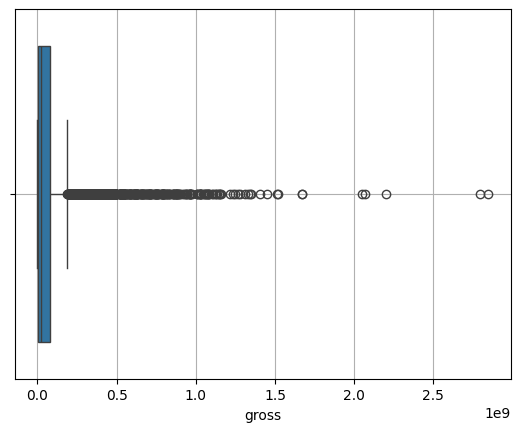

In [60]:
# Check Outliers using a boxplot for gross values using boxplots
sns.boxplot(data= movie, x='gross')
plt.grid(True)
plt.show()

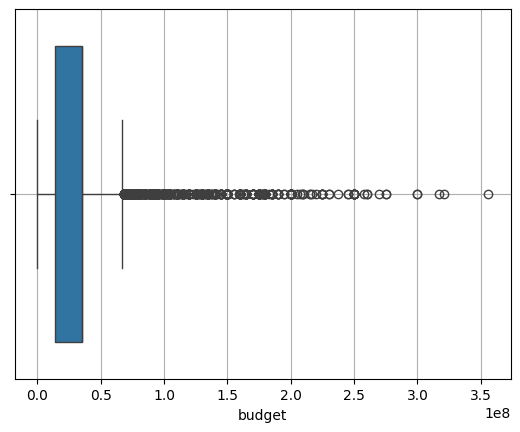

In [59]:
# Check Outliers using a boxplot for budget values using boxplots
sns.boxplot(data= movie, x= 'budget')
plt.grid(True)

plt.show()

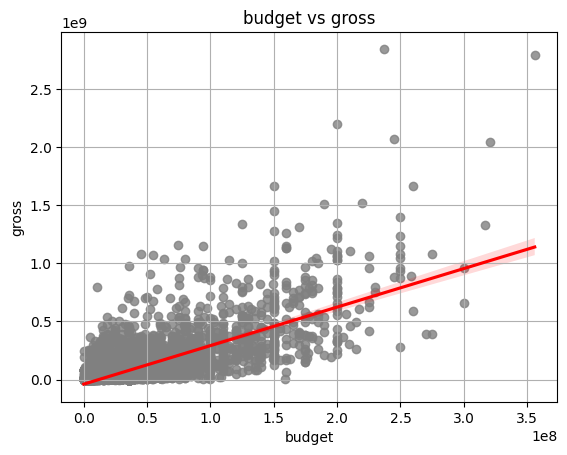

In [95]:
# Scatter plot shows the budget vs gross: 
sns.regplot(movie, x='budget', y= 'gross', scatter_kws={'color': 'gray'}, line_kws={'color': 'red'})
plt.title('budget vs gross')
plt.grid(True)
plt.show()

In [100]:
# heatmap show corr: 
data_corr=movie.corr(numeric_only=True)

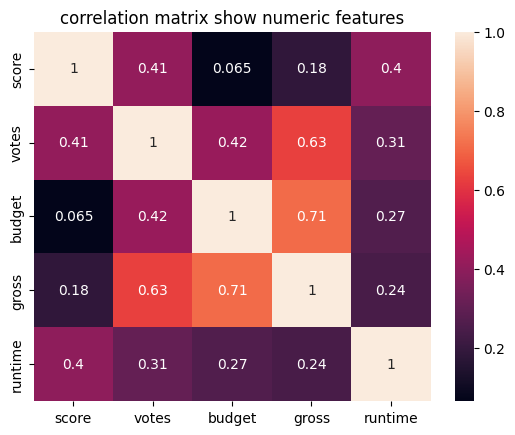

In [104]:
sns.heatmap(data=data_corr, annot=True)
plt.title('correlation matrix show numeric features')
plt.show()

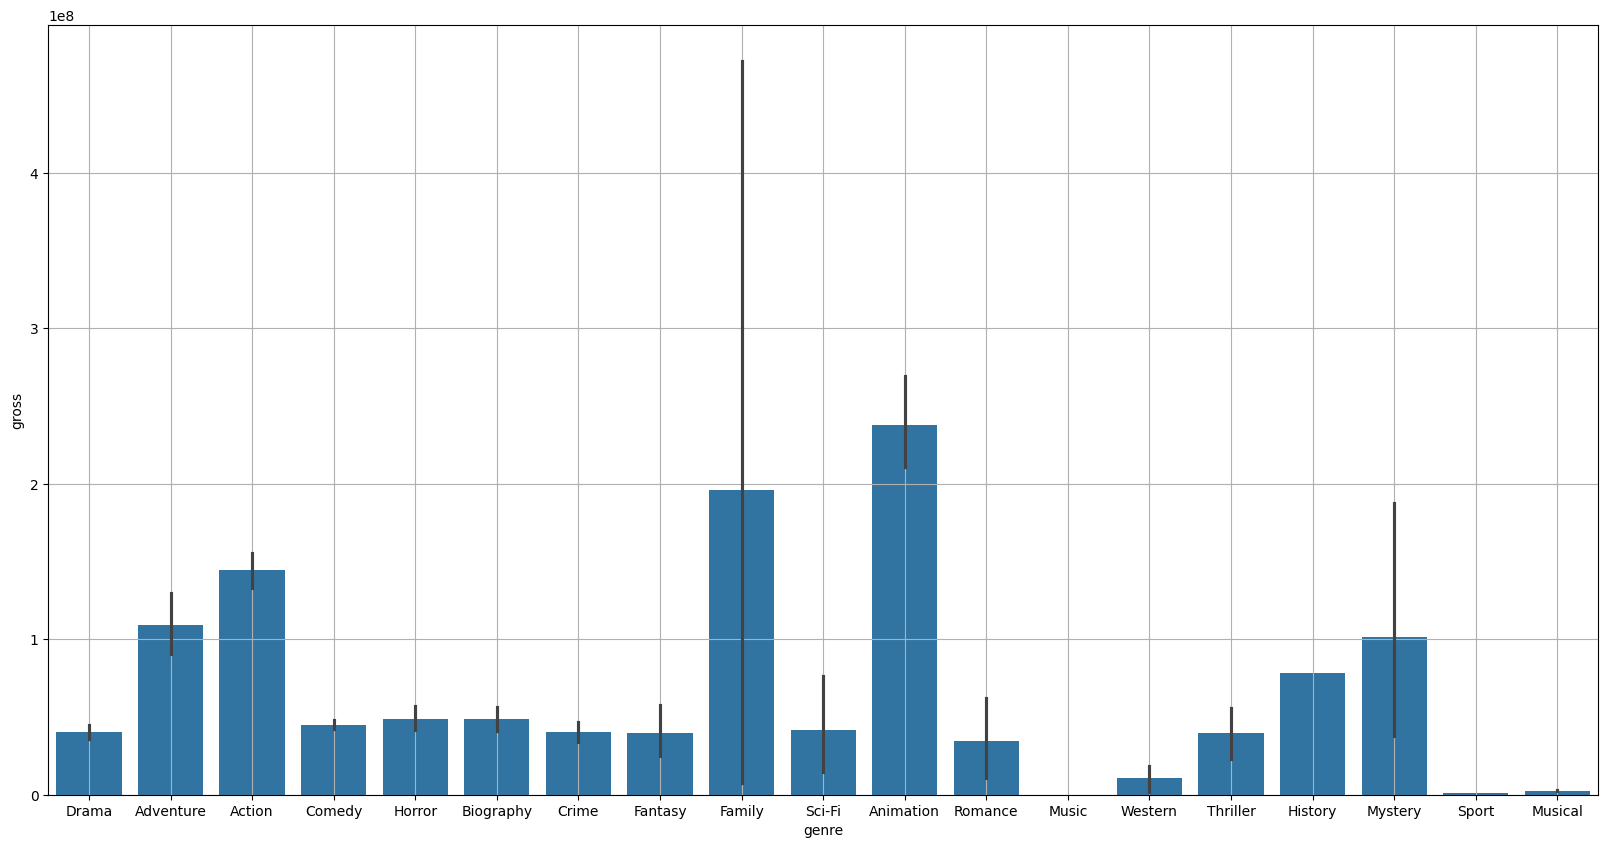

In [58]:
# # Plot the most popular genres based on gross revenue 
plt.figure(figsize=(20, 10))
sns.barplot(data=movie, x= 'genre', y='gross')
plt.grid(True)
plt.show()

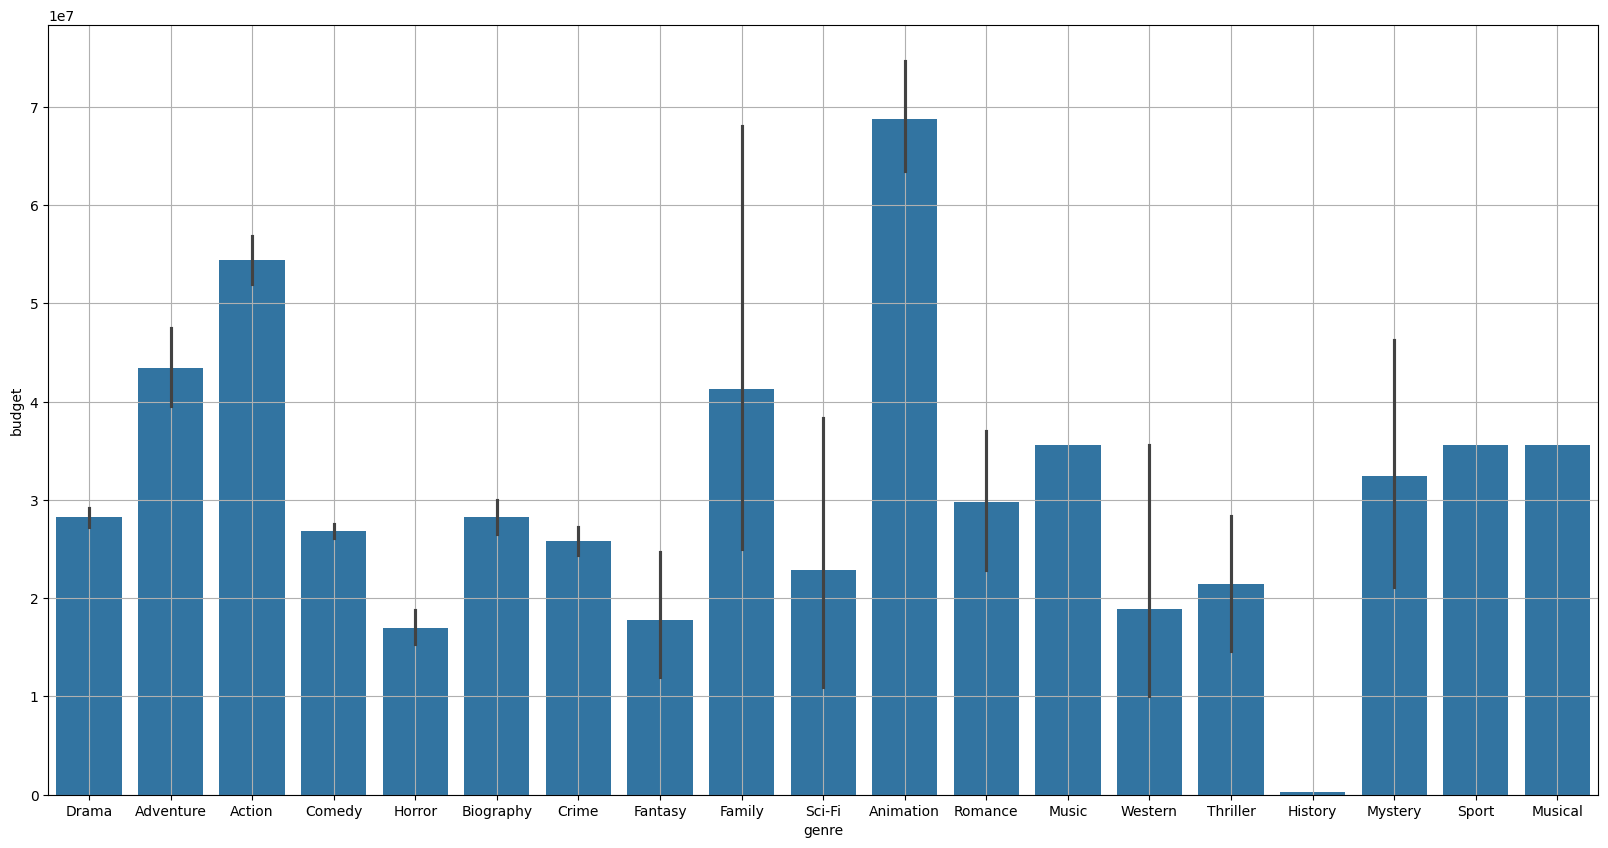

In [57]:
# # Budget vs genre 
plt.figure(figsize=(20, 10))
sns.barplot(movie, x= 'genre', y= 'budget')
plt.grid(True)
plt.show()

In [45]:
# most # Group by country and sum the budgets
country_budget = movie.groupby('country')['budget'].sum().sort_values(ascending=False)[0: 10]

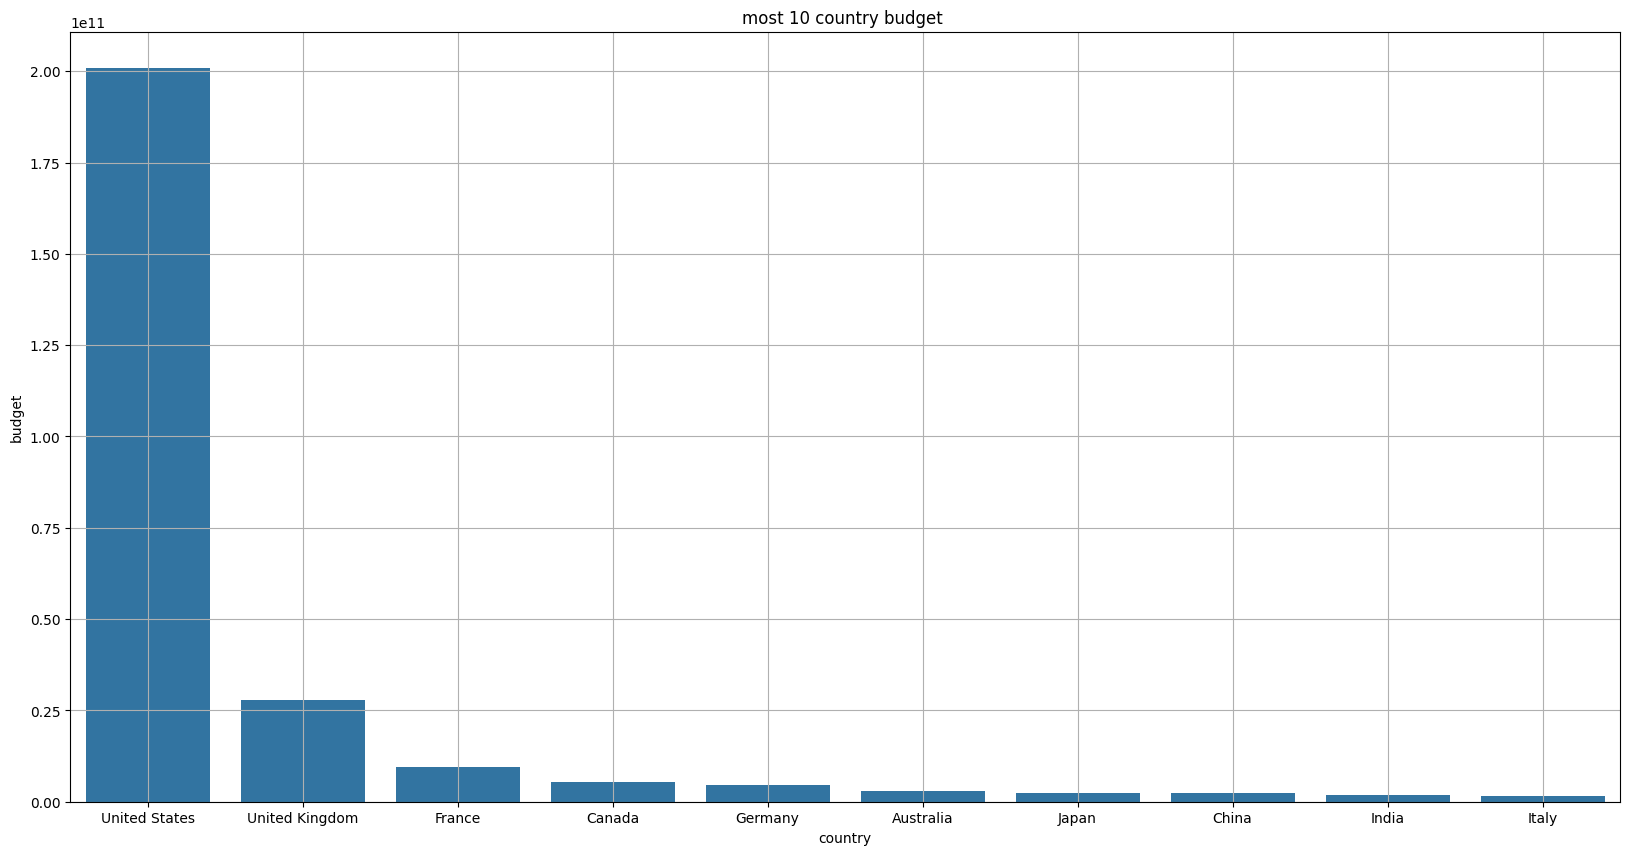

In [56]:
# the top 10 country budget 
plt.figure(figsize=(20, 10))
sns.barplot(country_budget)
plt.title('most 10 country budget ')
plt.grid(True)
plt.show()

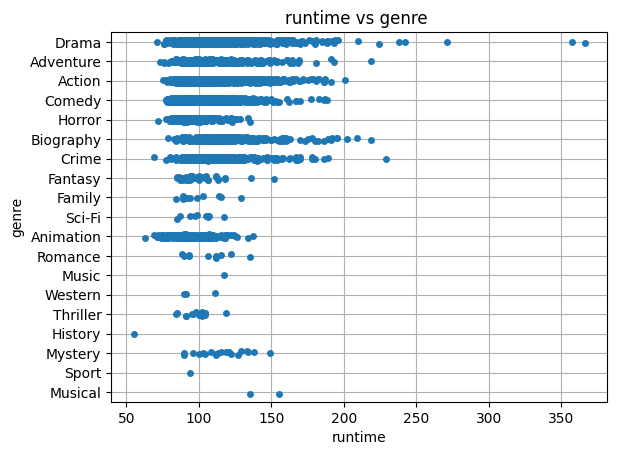

In [55]:
# runtime vs genre 
sns.stripplot(data=movie, x= 'runtime', y= 'genre')
plt.title('runtime vs genre ')
plt.grid(True)
plt.show()